# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('tesla_stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

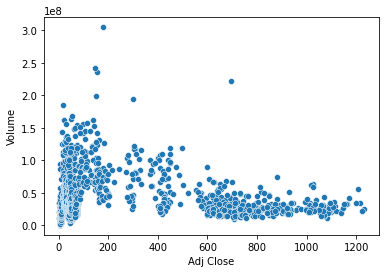

In [3]:
sns.scatterplot(df['Adj Close'],df.Volume)

In [4]:
df.shape

(2959, 7)

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2959 non-null   object 
 1   Open       2959 non-null   float64
 2   High       2959 non-null   float64
 3   Low        2959 non-null   float64
 4   Close      2959 non-null   float64
 5   Adj Close  2959 non-null   float64
 6   Volume     2959 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.9+ KB


In [7]:
num_cols=df.select_dtypes(include='float64')

In [8]:
new_df=df.drop('Date',axis=1)

In [9]:
np.corrcoef(df.Open,df.Volume)

array([[1.        , 0.08895935],
       [0.08895935, 1.        ]])

<AxesSubplot:>

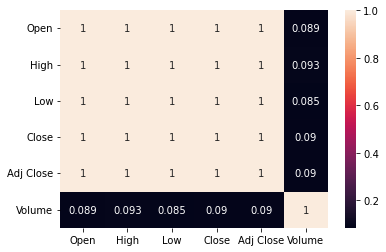

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
logt=np.log(df.Volume)
logt

0       18.357011
1       18.269108
2       17.531373
3       17.061963
4       17.351661
          ...    
2954    17.510009
2955    16.949856
2956    16.842882
2957    17.343185
2958    17.346820
Name: Volume, Length: 2959, dtype: float64

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
np.corrcoef(df['Adj Close'],logt)

array([[1.        , 0.20396761],
       [0.20396761, 1.        ]])

<AxesSubplot:xlabel='Volume'>

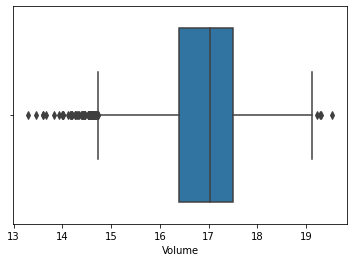

In [14]:
sns.boxplot(logt)

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
X=df.drop(['Date','Volume'],axis=1)
y=logt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [22]:
X.head()

,Open,High,Low,Close,Adj Close
0,3.800,5.000,3.508,4.778,4.778
1,5.158,6.084,4.660,4.766,4.766
2,5.000,5.184,4.054,4.392,4.392
3,4.600,4.620,3.742,3.840,3.840
4,4.000,4.000,3.166,3.222,3.222


In [23]:
X.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

In [34]:
y.head()

0    18.357011
1    18.269108
2    17.531373
3    17.061963
4    17.351661
Name: Volume, dtype: float64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
ytrain_pred=model.predict(X_train)
ytest_pred=model.predict(X_test)

In [27]:
mean_squared_error(y_train,ytrain_pred)

0.8775342552840691

In [32]:
mean_squared_error(y_test,ytest_pred)

0.8962828889571346

In [29]:
from sklearn.metrics import accuracy_score,r2_score

In [33]:
r2_score(y_test,ytest_pred)*100

7.71095724782358

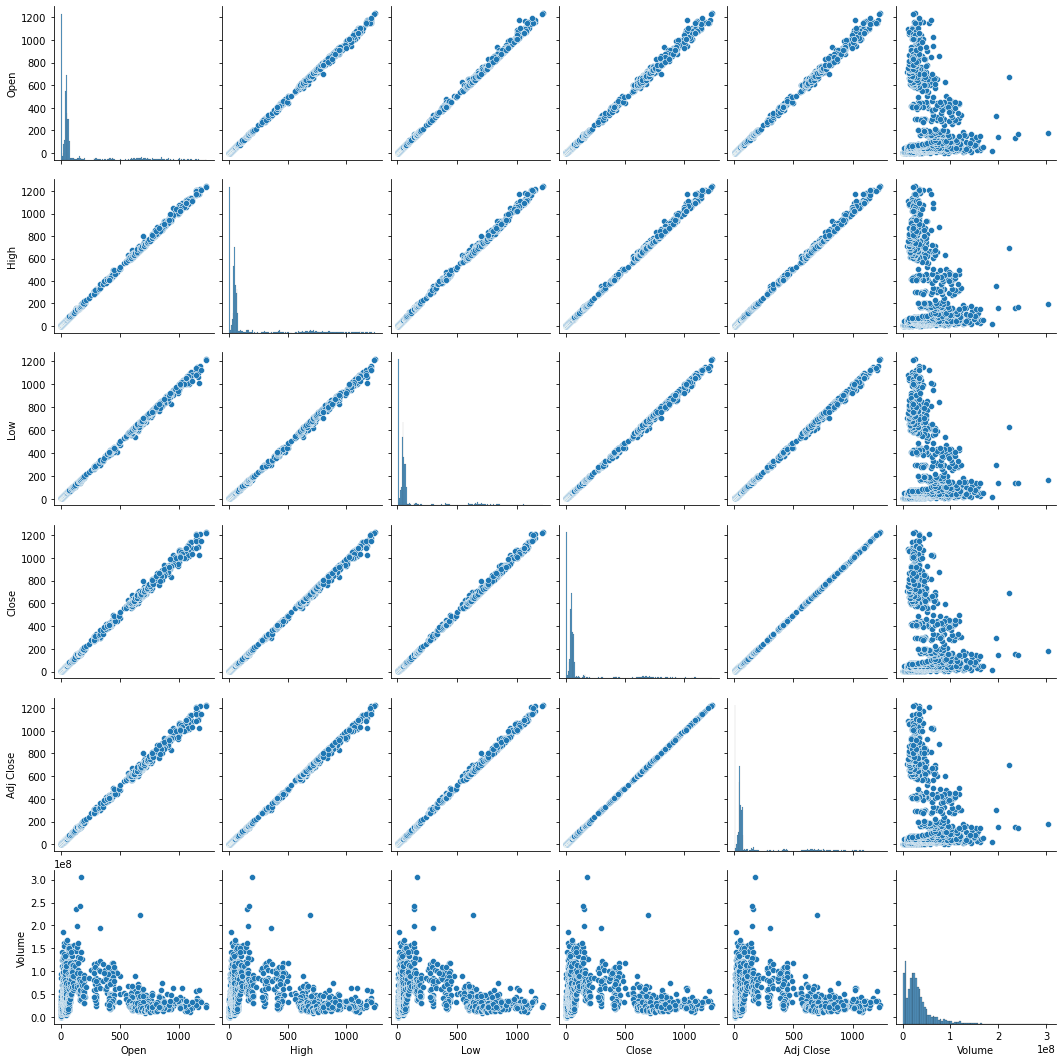

In [35]:
sns.pairplot(df)